In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

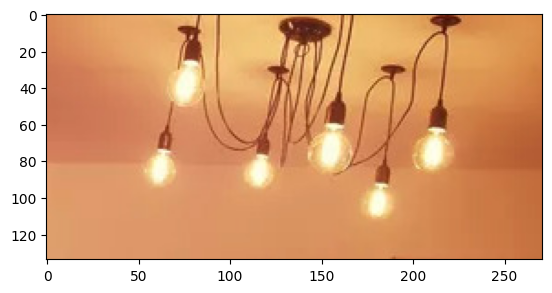

In [4]:
im = cv2.imread('../../img/focos.jpg')
plt.imshow(im[:,:,::-1])

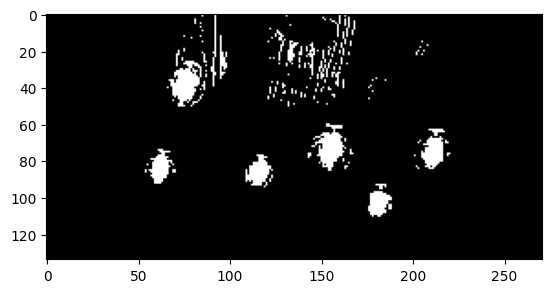

In [45]:
"""
En el espacio de color HSV (Hue, Saturation, Value), la componente "Value" (V) 
representa la luminancia o la claridad de un color. Es decir, indica la cantidad de luz presente en el color.
Un valor alto de "Value" indica que el color es más claro, mientras que un valor bajo indica que el color es más oscuro.
"""

# Convertir la imagen a espacio de color HSV
imagen_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

# Extraer la componente de valor (Value)
value_channel = imagen_hsv[:, :, 2]

# Aplicar umbral en la componente de valor
umbral_inferior = 245
umbral_superior = 255
_, msk = cv2.threshold(value_channel, umbral_inferior, umbral_superior, cv2.THRESH_BINARY)

# Visualizar la máscara (opcional)
plt.imshow(msk, cmap = 'gray')


[  0 255]


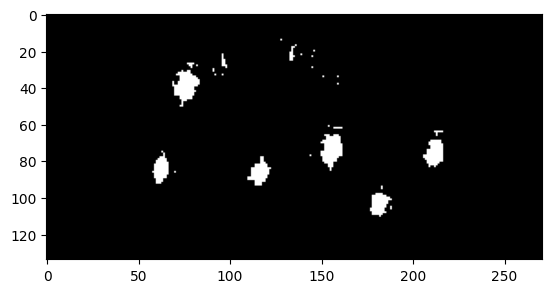

In [46]:
msk = cv2.erode(msk, np.ones((2,2), np.uint8))
plt.imshow(msk, cmap = 'gray')
print(np.unique(msk))

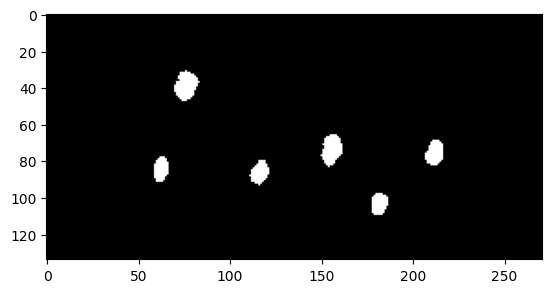

In [50]:
msk =  cv2.medianBlur(msk, 5)
plt.imshow(msk, cmap = 'gray')


(-0.5, 270.5, 133.5, -0.5)

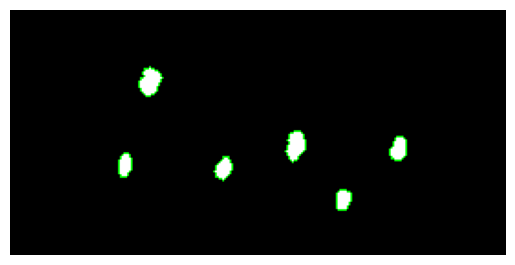

In [52]:
contours, _ = cv2.findContours(msk, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_img_before_filtering = msk.copy()
contours_img_before_filtering = cv2.cvtColor(contours_img_before_filtering, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contours_img_before_filtering, contours, -1, (0, 255, 0), 1)
plt.imshow(contours_img_before_filtering)
plt.axis('off')


In [55]:
filtered_contours = []
df_mean_color = pd.DataFrame()

cnt = 0
for idx, contour in enumerate(contours) :
    area = int(cv2.contourArea(contour))
    if area < 200 and area > 50 :
        filtered_contours.append(contour)
        masked = np.zeros_like(im[:,:,0])
        cv2.drawContours(masked, [contour], 0, 255, -1)
        B_mean, G_mean, R_mean, _ = cv2.mean(im, mask=masked)
        df = pd.DataFrame({'B_mean': B_mean, 'G_mean': G_mean, 'R_mean': R_mean}, index=[idx])
        df_mean_color = pd.concat([df_mean_color, df])

df_mean_color.head()

,B_mean,G_mean,R_mean
0,210.714286,247.505495,252.615385
1,208.242424,246.939394,253.424242
2,214.318681,248.296703,253.120879
3,217.137615,249.678899,253.743119
4,214.972789,248.721088,252.591837


In [60]:
print(f"hay {len(filtered_contours)} focos")

hay 6 focos
